In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color_pal = sns.color_palette("bright")
df = pd.read_csv("dummy-data.csv")
df.head()

,hCG,Progesterone,Estrogen,WBC,Hemoglobin,Platelets,Iron,Calcium,BloodGlucose,PregnancyStatus,MonthsPregnant
0,248784.470700,170.785987,9468.783784,7582.488551,13.120158,259873.0689,134.100011,8.259462,134.901093,1,8
1,170919.419000,194.106835,6729.066152,9399.517199,11.364276,117688.6812,108.650660,7.160563,134.645759,1,9
2,2168.123899,57.552302,12452.900490,10498.859680,13.363678,256516.3466,62.374636,8.675587,131.896751,1,3
3,1.098110,11.637167,116.589552,7443.692070,12.285418,346203.3345,51.143076,8.926937,97.239806,0,0
4,238678.209600,74.029022,26035.285430,15093.647280,10.522879,220163.8419,62.830595,8.951363,115.568916,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hCG              500 non-null    float64
 1   Progesterone     500 non-null    float64
 2   Estrogen         500 non-null    float64
 3   WBC              500 non-null    float64
 4   Hemoglobin       500 non-null    float64
 5   Platelets        500 non-null    float64
 6   Iron             500 non-null    float64
 7   Calcium          500 non-null    float64
 8   BloodGlucose     500 non-null    float64
 9   PregnancyStatus  500 non-null    int64  
 10  MonthsPregnant   500 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 43.1 KB


In [6]:
df.describe()

,hCG,Progesterone,Estrogen,WBC,Hemoglobin,Platelets,Iron,Calcium,BloodGlucose,PregnancyStatus,MonthsPregnant
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,72963.591655,88.412738,8988.089888,9904.228489,12.522010,245011.101780,95.671666,8.795145,98.971971,0.562000,2.412000
std,85385.205425,91.854023,10080.827324,3725.848628,1.848181,87087.564139,34.560974,0.920434,18.671250,0.496638,3.061536
min,0.004550,1.098055,100.100348,4035.601961,9.001164,100779.201800,30.687297,7.001234,70.437600,0.000000,0.000000
25%,3.193434,11.252356,127.403760,6998.127533,11.152644,177940.953500,68.594605,8.061391,84.774894,0.000000,0.000000
50%,26028.105715,45.933185,3928.016166,9127.188334,12.646618,232754.901500,93.711218,8.911417,93.727601,1.000000,1.000000
75%,150033.686450,165.855673,17753.528513,12845.836965,13.804289,295648.037575,122.303952,9.439115,112.505231,1.000000,5.000000
max,248784.470700,288.860222,29965.571180,17910.838080,15.996520,449459.050800,169.442631,10.487089,139.809407,1.000000,9.000000


In [16]:
df.shape
dfcols = df.columns

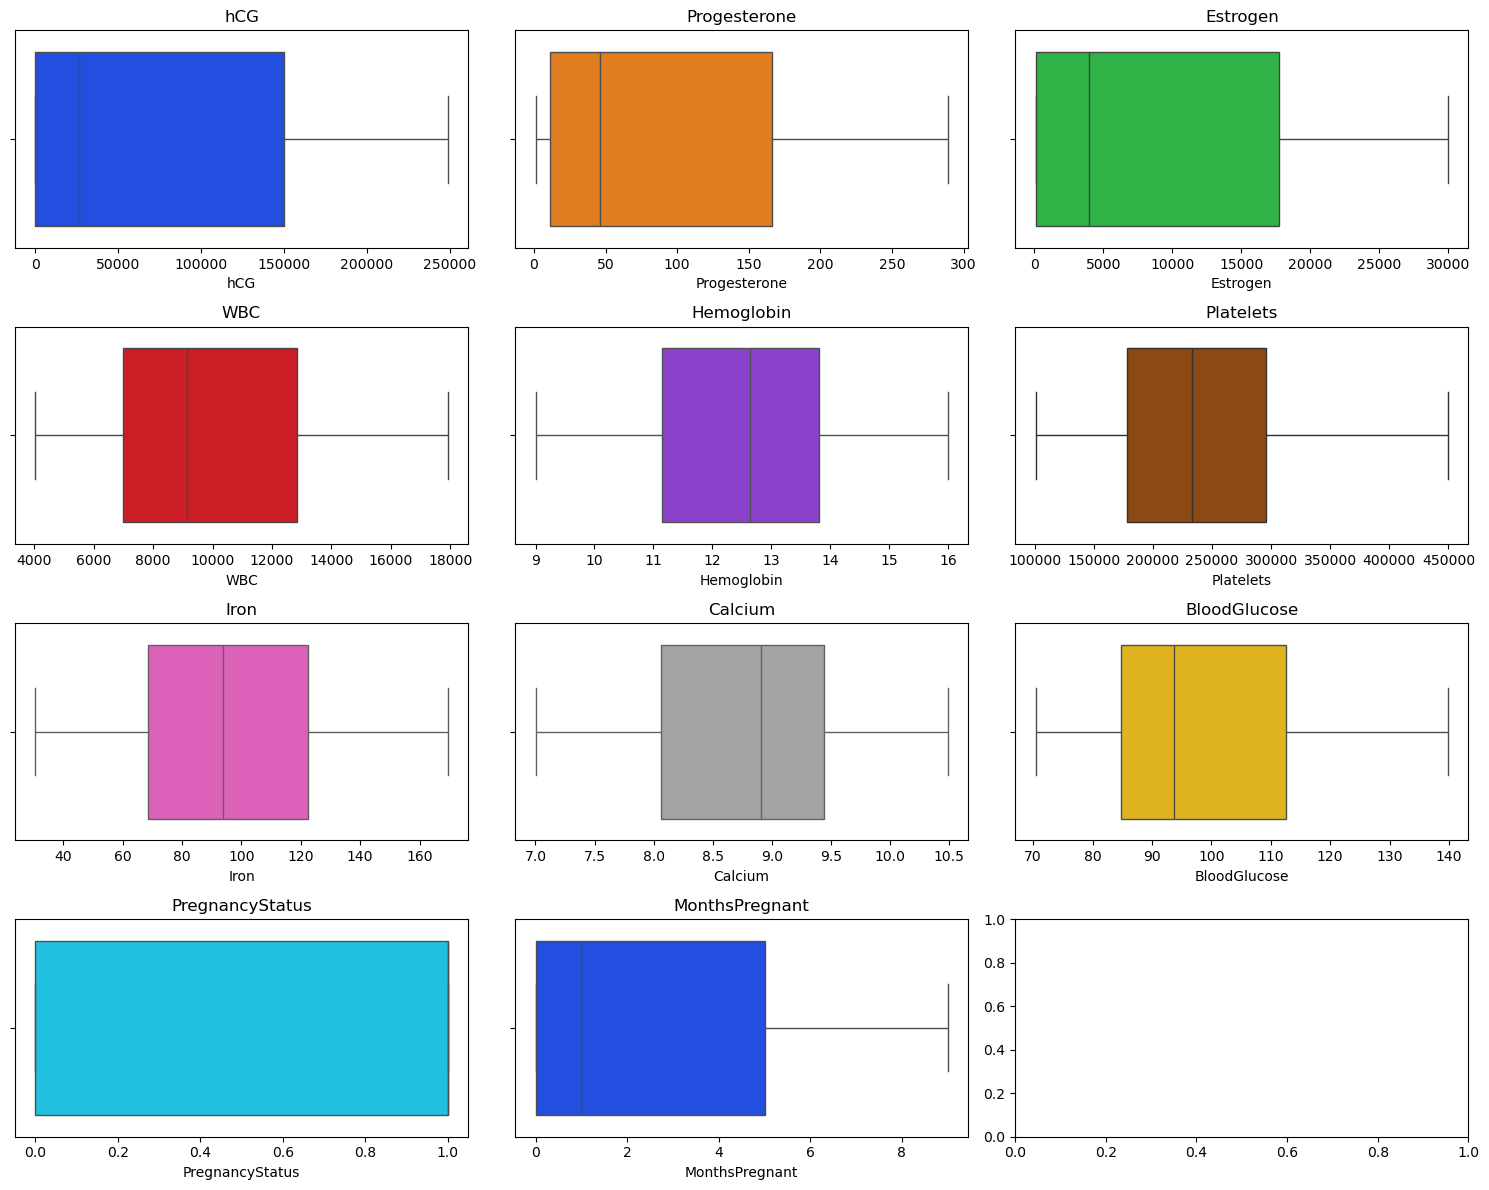

In [25]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))  # Adjust figure size if needed
for i in range(len(dfcols)):
    j = i%10
    row, col = divmod(i, 3)  # Calculate row and column index
    sns.boxplot(x=df[dfcols[i]], ax=ax[row, col], color=color_pal[j])
    ax[row, col].set_title(dfcols[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


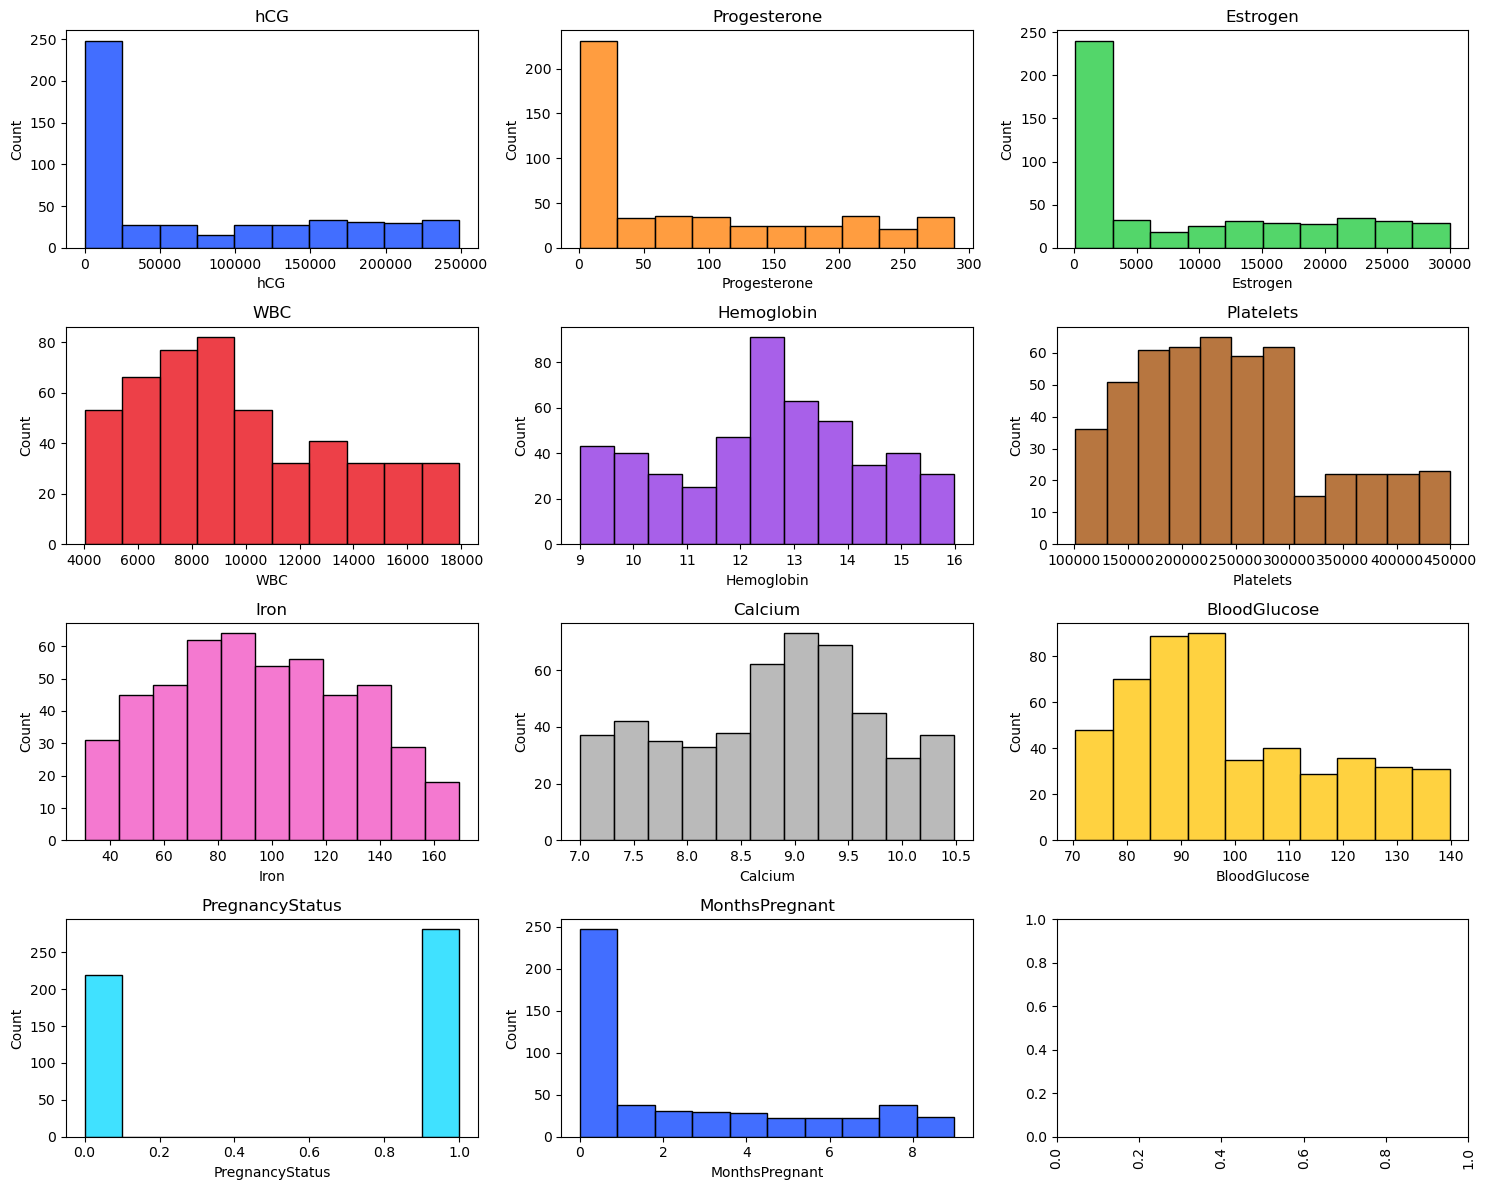

In [30]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))  # Adjust figure size if needed
for i in range(len(dfcols)):
    j = i%10
    row, col = divmod(i, 3)  # Calculate row and column index
    sns.histplot(x=df[dfcols[i]], ax=ax[row, col], color=color_pal[j])
    plt.xticks(rotation=90)
    ax[row, col].set_title(dfcols[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


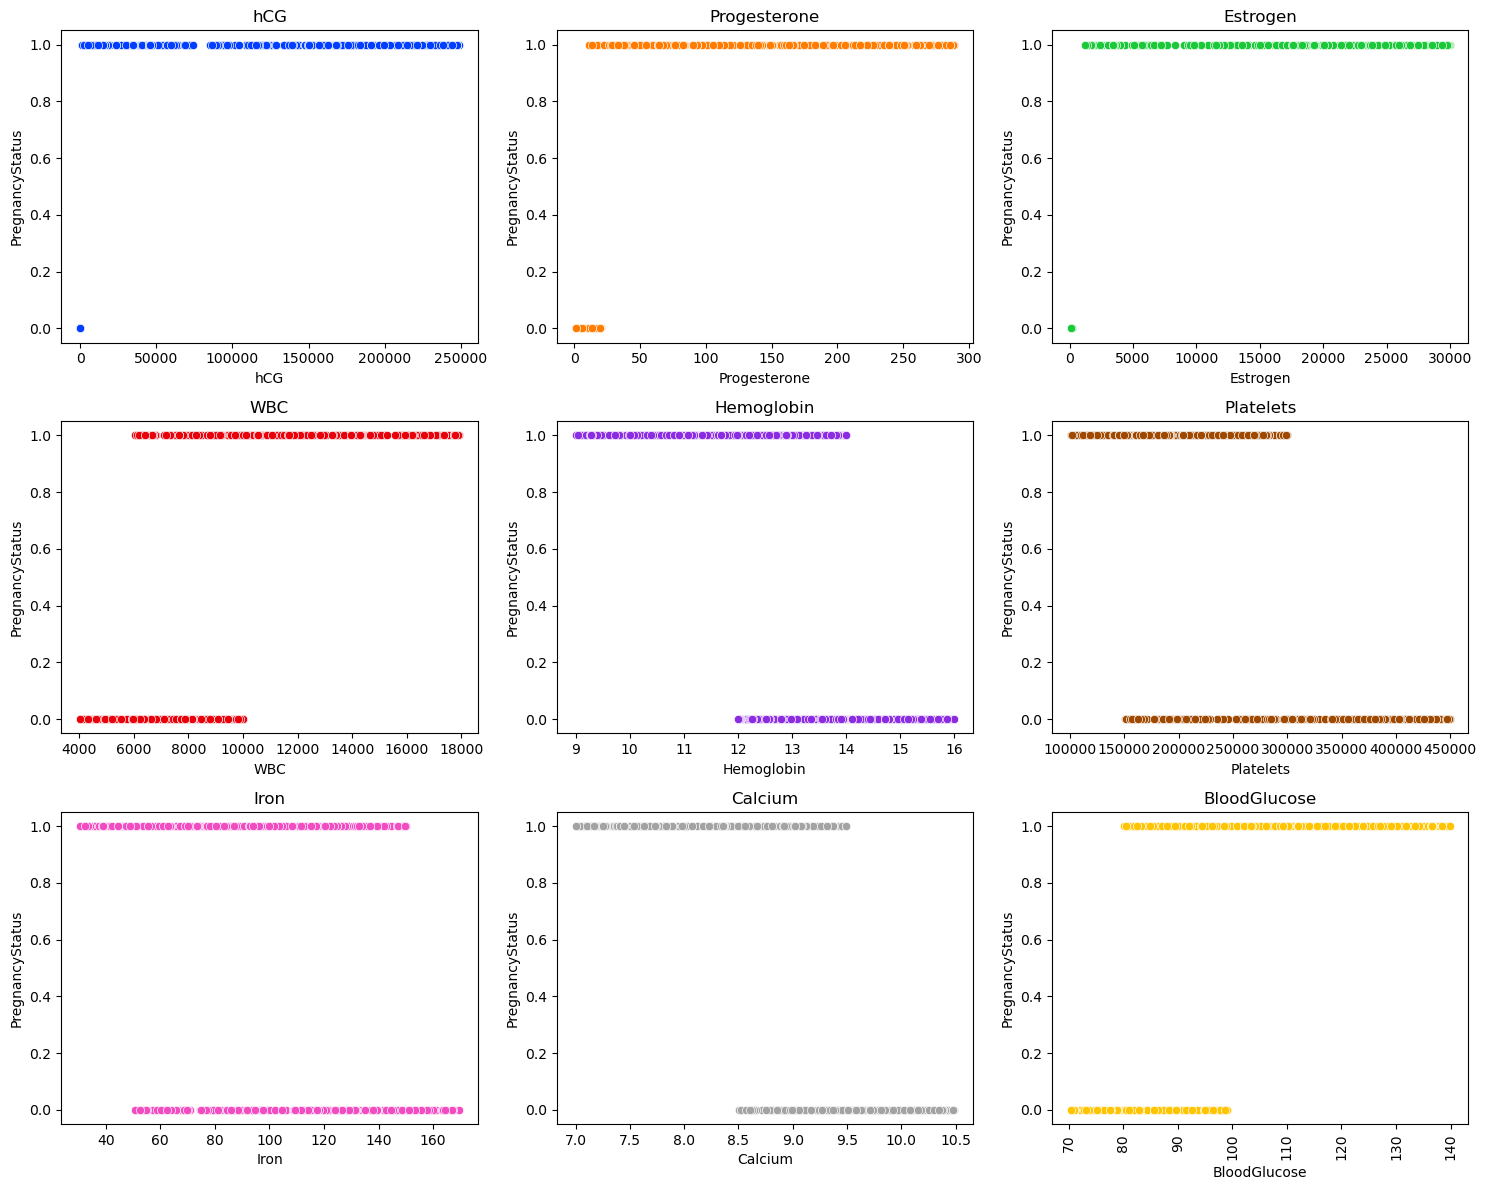

In [34]:
features = dfcols[:-2]
target_yn = df['PregnancyStatus']
fig, ax = plt.subplots(3, 3, figsize=(15, 12))  # Adjust figure size if needed
for i in range(len(features)):
    j = i%10
    row, col = divmod(i, 3)  # Calculate row and column index
    sns.scatterplot(x=df[features[i]], y=targetyn, ax=ax[row, col], color=color_pal[j])
    plt.xticks(rotation=90)
    ax[row, col].set_title(dfcols[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


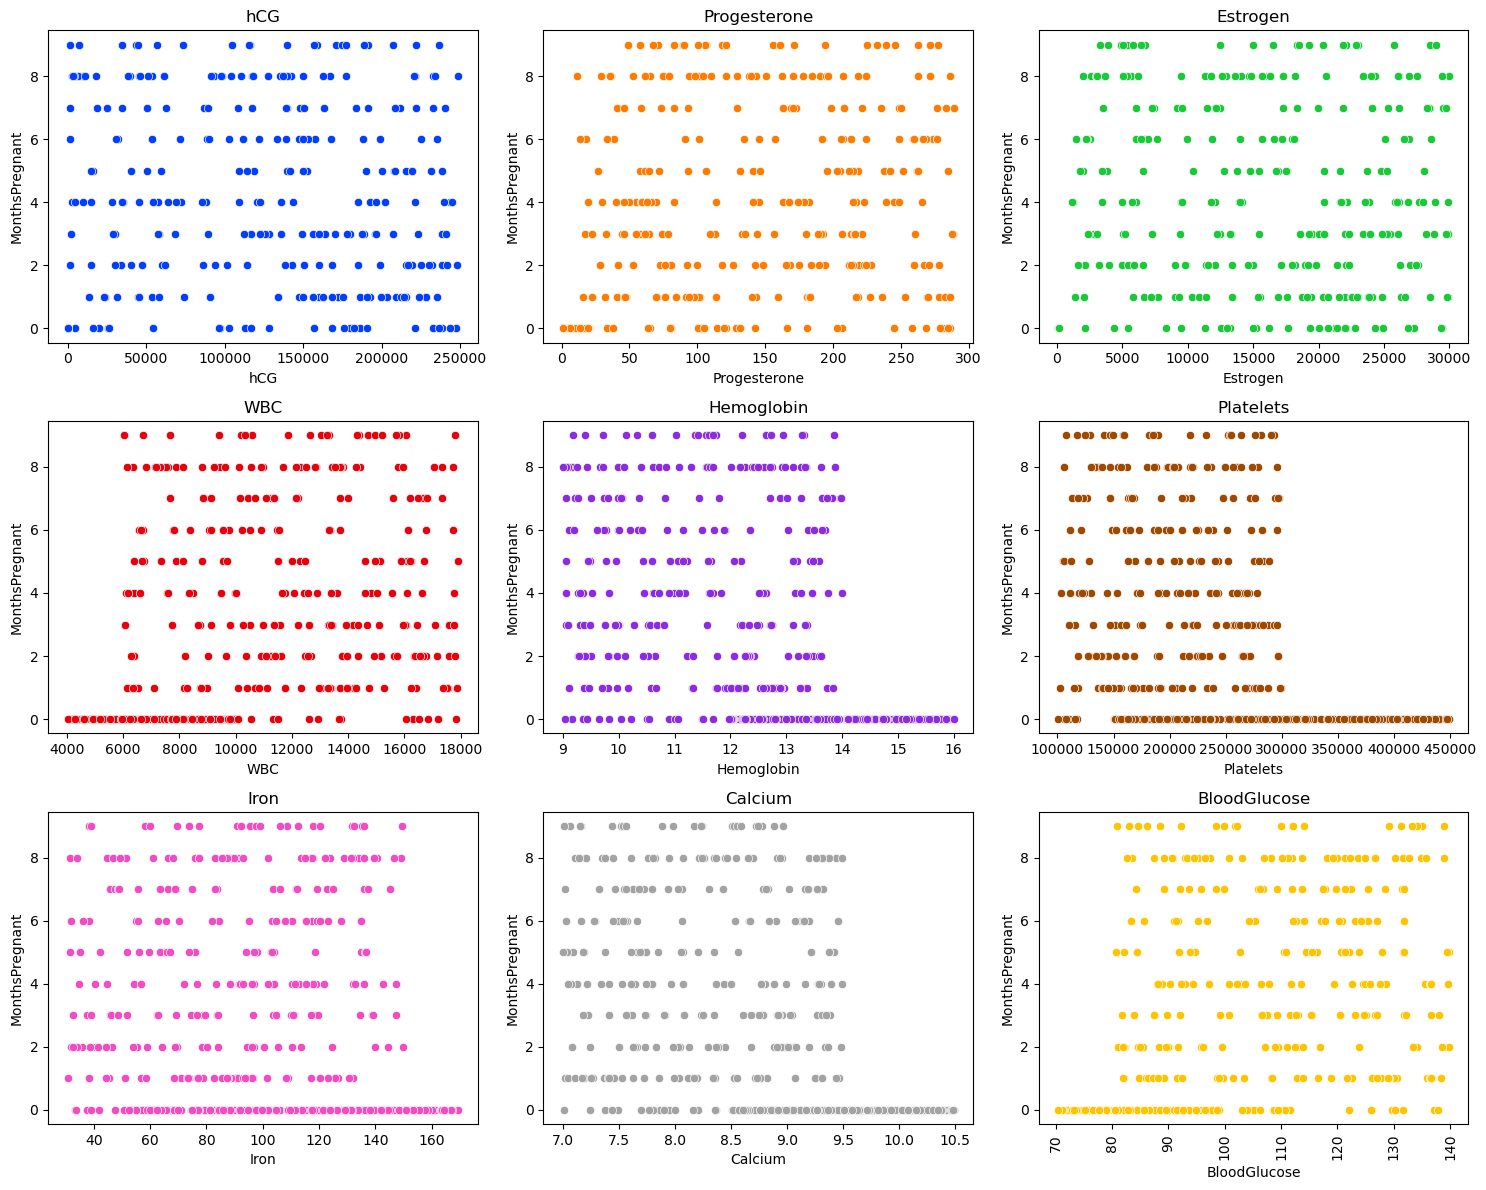

In [36]:
features = dfcols[:-2]
target_pregmonths = df['MonthsPregnant']
fig, ax = plt.subplots(3, 3, figsize=(15, 12))  # Adjust figure size if needed
for i in range(len(features)):
    j = i%10
    row, col = divmod(i, 3)  # Calculate row and column index
    sns.scatterplot(x=df[features[i]], y=target_pregmonths, ax=ax[row, col], color=color_pal[j])
    plt.xticks(rotation=90)
    ax[row, col].set_title(dfcols[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Added R-squared

X = df.drop(columns="MonthsPregnant") 
y = df.MonthsPregnant
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)  # R-squared added
print(f"Linear Regression MSE: {mse_lr}, R-squared: {r2_lr}")

# Train Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)  # R-squared added
print(f"Decision Tree MSE: {mse_dt}, R-squared: {r2_dt}")

# Train Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)  # R-squared added
print(f"Random Forest MSE: {mse_rf}, R-squared: {r2_rf}")

Linear Regression MSE: 4.892034998512099, R-squared: 0.48230242565694836
Decision Tree MSE: 9.08, R-squared: 0.03911276667795449
Random Forest MSE: 5.253392, R-squared: 0.4440619708770741


In [46]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid,
                              n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=1)

rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_
print("Best parameters:", best_params)

# Evaluate the model with the best parameters
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Random Forest (Best) MSE: {mse_best_rf}, R-squared: {r2_best_rf}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Random Forest (Best) MSE: 4.9404234153660465, R-squared: 0.4771817415164613


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}, R-squared: {r2_poly}")

Polynomial Regression MSE: 5.5919372957421025, R-squared: 0.4082355553947148
